# Comparación estadística de Energía de señales EEG

### 1. Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.

**La fórmula de energía es la siguiente:**

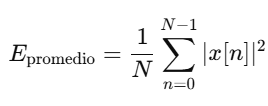

Donde:

E = Energía de la señal

N = Número de muestras

X(n) = Es la señal

*(Debemos tener en cuenta que las filas de la señal son las muestras y las columnas son los canales)*

In [203]:
import numpy as np
import scipy.io as sio

def EnergiaProm(signal): #Recibe una señal con la forma: (Canales, muestras, épocas)
    Energia = np.square(signal)
    
    # Promedio en el eje de muestras (por época)
    EnergiaEpoca = np.sum(np.square(signal), axis=1) #Primero se le calcula el cuadrado a todos los elementos de la señal y luego se suman
    # Promedio sobre las épocas
    EnergiaPromedio = np.mean(EnergiaEpoca, axis=1) #Se calcula el promedio, y se pone axis=1, que corresponde al eje de las épocas.
    
    return EnergiaPromedio

### 2. Calcule la energía de cada canal promediada por épocas para cada sujeto, esto para ambos grupos poblacionales. Guarde esta información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para cada grupo poblacional.

In [204]:
# Importamos las librerias que vamos a necesitar

import os
import matplotlib.pyplot as plt
import pandas as pd

In [205]:
# Listar archivos en cada carpeta
control = os.listdir('../Data/control')
parkinson = os.listdir('../Data/parkinson')

# Carpeta Control
# Imprimimos los archivos que contiene cada carpeta y la cantidad de archivos
print("Archivos en carpeta control:", control) 
print("El archivo control contiene la información de",len(control), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

# Carpeta parkinson
# Imprimimos los archivos que contiene cada carpeta y la cantidad de archivos
print("\nArchivos en carpeta parkinson:", parkinson)
print("El archivo parkinson contiene la información de",len(parkinson), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

Archivos en carpeta control: ['C001R_EP_reposo.mat', 'C002_EP_reposo.mat', 'C004_EP_reposo.mat', 'C005_EP_reposo_Repetido.mat', 'C006_EP_reposo.mat', 'C007_EP_reposo.mat', 'C010_EP_reposo.mat', 'C011_EP_reposo.mat', 'C012_EP_reposo.mat', 'C013_EP_reposo.mat', 'C015_EP_reposo.mat', 'C018_EP_reposo.mat', 'C019_EP_reposo.mat', 'C020_EP_reposo.mat', 'C021_EP_reposo.mat', 'C023_EP_reposo.mat', 'C024_EP_reposo.mat', 'C025_EP_reposo.mat', 'C026_EP_reposo.mat', 'C027_EP_reposo.mat', 'C028_EP_reposo.mat', 'C029_EP_reposo.mat', 'C030_EP_reposo.mat', 'C031_EP_reposo.mat', 'C032_EP_reposo.mat', 'C033R_EP_reposo.mat', 'C034_EP_reposo.mat', 'C036_EP_reposo.mat', 'C037_EP_reposo.mat', 'C040_EP_reposo.mat', 'C041_EP_reposo.mat', 'C042_EP_reposo.mat', 'C044_EP_reposo.mat', 'C045_EP_reposo.mat', 'C046_EP_reposo.mat', 'C049_EP_reposo.mat']
El archivo control contiene la información de 36 sujetos.

Archivos en carpeta parkinson: ['P001_EP_reposo.mat', 'P004_EP_reposo.mat', 'P005_EP_reposo.mat', 'P007_EP_r

In [206]:
# Cargamos la ruta del archivo control y parkinson
archivo_control = control[0]
ruta_Control = os.path.join('../Data/control', archivo_control)

archivo_parkinson = parkinson[0]
ruta_Parkinson = os.path.join('../Data/parkinson', archivo_parkinson)

# Cargamos el archivo
dataControl = sio.loadmat(ruta_Control)
dataParkinson = sio.loadmat(ruta_Parkinson)




In [207]:
# Estraemos las llaves de los archivos
dataControl.keys() #Observamos las claves del archivo

dict_keys(['__header__', '__version__', '__globals__', 'data'])

Las dimensiones son:  (8, 2000, 143)


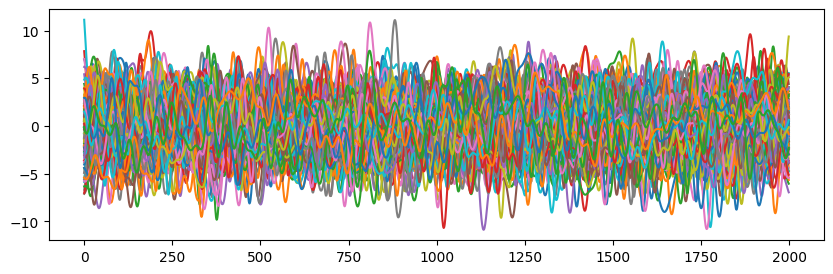

In [208]:
# Accedemos a 'data' que es quien tiene la información de las señales
signal = data['data']

#Miramos las dimensiones
print("Las dimensiones son: ", signal.shape)
# El orden de las dimensiones es: (canales, muestras, épocas)

signal

# Además visualizamos la señal
fig=plt.figure(figsize=(10,3))
plt.plot(signal[0,0:2000])
plt.show()

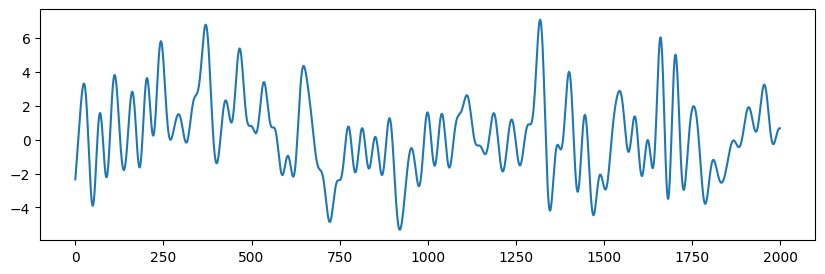

In [209]:
# Debido a que la señal tiene 3 dimensiones se muestra se esa manera, por lo que debemos redimensionar con reshape para que quede en una señal de 2 dimensiones
# Como tenemos que las dimensiones son: (8, 2000, 180), quedarían como: (8, 2000*180)

signal2d=np.reshape(signal,(signal.shape[0],signal.shape[1]*signal.shape[2]),order="F")
# Visualizamos las dimensiones
signal2d.shape

#Se visualiza la señal redimensionada
fig=plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.plot(signal2d[0,0:2000])
plt.show()

In [210]:
# Accedemos a las llaves del archivo de parkinson
dataParkinson.keys() #Observamos las claves del archivo

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [245]:
Energia_Control = {}
print(len(control))

# Recorremos el archivo control para calcular la energía promedio
for i in range(len(archivo_control)):
    dataControl
    data = sio.loadmat(ruta_control)
    signal = data["data"]
    energia_promedio = EnergiaProm(signal)
    Energia_Control[f'Sujeto {i+1}'] = energia_promedio


36


In [251]:
print(signal.shape)
Canales = [f'Canal {i+1}' for i in range(0,8)] #Ponemos en el rango 8, ya que sería el número de canales y deben salir 36 sujetos
df_control = pd.DataFrame.from_dict(Energia_Control, orient='index', columns=Canales)

print("Energía por épocas y canales de los sujetos en el archivo de Control")

df_control

(8, 2000, 180)
Energía por épocas y canales de los sujetos en el archivo de Control


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 2,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 3,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 4,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 5,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 6,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 7,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 8,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 9,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 10,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512


Ahora Repetimos lo mismo pero para el archivo de parkinson

In [247]:
Energia_Parkinson = {}
print(len(parkinson))

# Recorremos el archivo parkinson para calcular la energía promedio
for i in range(len(archivo_parkinson)):
    dataParkinson
    data2 = sio.loadmat(ruta_parkinson)
    signal2 = data2["data"]
    energia_promedio = EnergiaProm(signal2)
    Energia_Parkinson[f'Sujeto {i+1}'] = energia_promedio


23


In [248]:
print(signal2.shape)

(8, 2000, 143)


In [250]:
Canales = [f'Canal {i+1}' for i in range(0,8)] #Ponemos en el rango 8, ya que sería el número de canales y deben salir 23 sujetos
df_parkinson = pd.DataFrame.from_dict(Energia_Parkinson, orient='index', columns=Canales)

print("Energía por épocas y canales de los sujetos en el archivo de Parkinson")

df_parkinson


Energía por épocas y canales de los sujetos en el archivo de Parkinson


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 2,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 3,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 4,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 5,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 6,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 7,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 8,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 9,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
Sujeto 10,12438.24357,11261.1758,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.06534
